## Importieren von Bibliotheken und Daten

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import geopandas as gpd
import osmnx as ox
import contextily as cx
import data_preprocessing as dp
import folium
import streamlit as st
from shapely.geometry import shape

In [2]:
years = range(2020, 2024)
data_list = []

# Schleife über jedes Jahr
for year in years:
    df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
    
    # Entfernen von Leerzeichen in den Columns
    column_names = [dp.remove_space(column) for column in df.columns]
    df.columns = column_names

    # Hinzufügen des eingelesenen DataFrames zur Liste
    data_list.append(df)

# alle Daten zu einem einzigen DataFrame kombinieren 
df = pd.concat(data_list, ignore_index=True)

/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_38306/1466124582.py:6: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_38306/1466124582.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_38306/1466124582.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"MVG_Rad_Fahrten_{year}.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])


## Data Information

In [3]:
df.head()

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME
0,1,2020-01-01 00:10:00,2020-01-01 00:21:00,48.16957,11.58736,48.16568,11.56474,0,,0,
1,2,2020-01-01 00:14:00,2020-01-01 00:32:00,48.13652,11.5929,48.13502,11.57901,0,,0,
2,3,2020-01-01 00:25:00,2020-01-01 00:41:00,48.1706,11.54881,48.16562,11.5648,0,,0,
3,4,2020-01-01 00:29:00,2020-01-01 00:43:00,48.17433,11.56033,48.17326,11.59075,0,,0,
4,5,2020-01-01 00:29:00,2020-01-01 00:30:00,48.12354,11.53372,48.12374,11.53319,0,,0,


In [4]:
df.columns

Index(['Row', 'STARTTIME', 'ENDTIME', 'STARTLAT', 'STARTLON', 'ENDLAT',
       'ENDLON', 'RENTAL_IS_STATION', 'RENTAL_STATION_NAME',
       'RETURN_IS_STATION', 'RETURN_STATION_NAME'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760575 entries, 0 to 2760574
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Row                  int64         
 1   STARTTIME            datetime64[ns]
 2   ENDTIME              datetime64[ns]
 3   STARTLAT             object        
 4   STARTLON             object        
 5   ENDLAT               object        
 6   ENDLON               object        
 7   RENTAL_IS_STATION    object        
 8   RENTAL_STATION_NAME  object        
 9   RETURN_IS_STATION    object        
 10  RETURN_STATION_NAME  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 231.7+ MB


## Data Feintuning

### Entfernen von Leerzeichen

In [6]:
# Entfernen von Leerzeichen bei Stationsnamen
df["RENTAL_STATION_NAME"] = df["RENTAL_STATION_NAME"].apply(dp.remove_space)
df["RETURN_STATION_NAME"] = df["RETURN_STATION_NAME"].apply(dp.remove_space)

### Formatieren von Daten als Datetime

In [7]:
# STARTTIME und ENDTIME als datetime
df = dp.to_datetime(df)

### Löschen unnötiger Spalten

In [8]:
# Löschen von "Row"
df = df.drop("Row", axis=1)

### Optimierung der Koordinaten

In [9]:
# Formatierung der Koordinaten
# Entfernung ungültiger Daten
df = dp.handle_coordinates(df)

### Optimierung der Spalten IS_STATION

In [10]:
# Formatierung von is_station
df = dp.handle_is_station(df)
# Befüllen von is_station, je nachdem, ob Station Name vorhanden
df = dp.fill_is_station_values(df)

Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             
Formatierung nicht möglich, setze Wert auf NA: NULL             


## Erneute Überprüfung

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760575 entries, 0 to 2760574
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   STARTTIME            datetime64[ns]
 1   ENDTIME              datetime64[ns]
 2   STARTLAT             float64       
 3   STARTLON             float64       
 4   ENDLAT               float64       
 5   ENDLON               float64       
 6   RENTAL_IS_STATION    Int64         
 7   RENTAL_STATION_NAME  object        
 8   RETURN_IS_STATION    Int64         
 9   RETURN_STATION_NAME  object        
dtypes: Int64(2), datetime64[ns](2), float64(4), object(2)
memory usage: 215.9+ MB


In [12]:
for column in df.columns:
    print(f"Anzahl NA-Werte in {column}: {df[column].isna().sum()}")

Anzahl NA-Werte in STARTTIME: 0
Anzahl NA-Werte in ENDTIME: 0
Anzahl NA-Werte in STARTLAT: 19671
Anzahl NA-Werte in STARTLON: 19649
Anzahl NA-Werte in ENDLAT: 24819
Anzahl NA-Werte in ENDLON: 24799
Anzahl NA-Werte in RENTAL_IS_STATION: 0
Anzahl NA-Werte in RENTAL_STATION_NAME: 0
Anzahl NA-Werte in RETURN_IS_STATION: 0
Anzahl NA-Werte in RETURN_STATION_NAME: 0


## Ergänzung einer Spalte für die Dauer einer Fahrt

In [13]:
# Hinzufügen einer Spalte für die Dauer
df["DURATION"] = df["ENDTIME"] - df["STARTTIME"]

# Entfernen von ungültigen Datenpunkten
df = dp.remove_invalid_datetime(df)


## Entfernen aller Zeilen mit NAN-Werten, Sicherung des ursprünglichen DataFrames

In [14]:
# Achtung: Zu welchem Zeitpunkt soll dies hier geschehen?

df_with_NA_coordinates = df.copy()
df = df.dropna()

## Ergänzung geographischer Daten

### Ergänzung von GeoDatenpunkten

In [15]:
# Füge GeoSeries für die einzelnen Punkte hinzu
df['START_POINT'] = gpd.GeoSeries.from_xy(df['STARTLON'], df['STARTLAT'], crs="EPSG:4326")
df['END_POINT'] = gpd.GeoSeries.from_xy(df['ENDLON'], df['ENDLAT'], crs="EPSG:4326")

### Ergänzung von Stadtvierteln für Start- und Endpunkte

In [16]:
# Hinzufügen von Stadtvierteln, in denen die Start- und Endpunkte jeweils liegen

city_districts = gpd.read_file("neighbourhoods.geojson") # Stadtviertel-geojson, von AirBNB

# Erstelle zwei Geometrien für Start- und Endpunkte
geo_start = gpd.points_from_xy(x=df['STARTLON'], crs="EPSG:4326", y=df['STARTLAT'])
geo_end = gpd.points_from_xy(x=df['ENDLON'], crs="EPSG:4326", y=df['ENDLAT'])

# Erstelle zwei GeoDataFrames (ein GeoDataFrame nimmt immer nur eine Geometrie an) für Start- und Endpunkte
gdf_start = gpd.GeoDataFrame(df[["STARTLAT", "STARTLON"]], geometry=geo_start)
gdf_end = gpd.GeoDataFrame(df[["STARTLAT", "STARTLON"]], geometry=geo_end)

# Führe einen Spatial Join durch, um das Stadtviertel für den Endpunkt zu finden
gdf_start_join = gpd.sjoin(gdf_start, city_districts[['geometry', 'neighbourhood']], how="left", predicate='within', rsuffix='_start')
gdf_end_join = gpd.sjoin(gdf_end, city_districts[['geometry', 'neighbourhood']], how="left", predicate='within', rsuffix='_end')

# Füge die Resultatspalten dem DataFrame hinzu
df['CITY_DISTRICT_START'] = gdf_start_join["neighbourhood"]
df['CITY_DISTRICT_END'] = gdf_end_join["neighbourhood"]

### Ergänzung der Information, ob Start- oder Endpunkt in der city area liegen
In der city area können Fahrräder ohne Bußgeld überall abgestellt werden. Außerhalb der city area ist dies nur an Stationen möglich.

In [17]:
city_area = gpd.read_file("city_area.geojson") # city-area-geojson, selbst erstellt auf geojson.io, per Augenmaß anhand der in der MVGO-App ersichtlichen Ränder der city area

# Geometrie-Variablen von oben können hier weiter verwendet werden, müssen aber in passendes Koordinatenreferenzsystem gecastet werden
gdf_city_start = gdf_start.to_crs(epsg=4326)
gdf_city_end = gdf_end.to_crs(epsg=4326)

# Erstellen eines Shapely Polygons
polygon = shape(city_area["geometry"][0])

# Prüfen, ob Punkte in Polygon liegen, speichern in neuer Spalte
gdf_city_start["RENTAL_IS_CITY"] = gdf_start["geometry"].within(polygon)
gdf_city_end["RETURN_IS_CITY"] = gdf_end["geometry"].within(polygon)
gdf_city_start.head()

# Hinzufügen der Resultatspalten zu DataFrame
df['RENTAL_IS_CITY'] = gdf_city_start["RENTAL_IS_CITY"]
df['RETURN_IS_CITY'] = gdf_city_end["RETURN_IS_CITY"]

# Wahrheitswerte zu Integers umcasten
df['RENTAL_IS_CITY'] = df['RENTAL_IS_CITY'].astype('Int64')
df['RETURN_IS_CITY'] = df['RETURN_IS_CITY'].astype('Int64')

df.head()

,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,DURATION,START_POINT,END_POINT,CITY_DISTRICT_START,CITY_DISTRICT_END,RENTAL_IS_CITY,RETURN_IS_CITY
0,2020-01-01 00:10:00,2020-01-01 00:21:00,48.16957,11.58736,48.16568,11.56474,0,,0,,0 days 00:11:00,POINT (11.58736 48.16957),POINT (11.56474 48.16568),Schwabing-Freimann,Schwabing-West,1,1
1,2020-01-01 00:14:00,2020-01-01 00:32:00,48.13652,11.59290,48.13502,11.57901,0,,0,,0 days 00:18:00,POINT (11.5929 48.13652),POINT (11.57901 48.13502),Au-Haidhausen,Altstadt-Lehel,1,1
2,2020-01-01 00:25:00,2020-01-01 00:41:00,48.17060,11.54881,48.16562,11.56480,0,,0,,0 days 00:16:00,POINT (11.54881 48.1706),POINT (11.5648 48.16562),Milbertshofen-Am Hart,Schwabing-West,1,1
3,2020-01-01 00:29:00,2020-01-01 00:43:00,48.17433,11.56033,48.17326,11.59075,0,,0,,0 days 00:14:00,POINT (11.56033 48.17433),POINT (11.59075 48.17326),Schwabing-West,Schwabing-Freimann,1,1
4,2020-01-01 00:29:00,2020-01-01 00:30:00,48.12354,11.53372,48.12374,11.53319,0,,0,,0 days 00:01:00,POINT (11.53372 48.12354),POINT (11.53319 48.12374),Sendling-Westpark,Sendling-Westpark,1,1


## Darstellung von Datenpunkten auf Karten

In [18]:
# Im Folgenden Test verschiedener Map-Optionen. Darstellung der Daten nur eines einzelnen Tages

january_1_2023 = df[(df["STARTTIME"].dt.year == 2023) & (df["STARTTIME"].dt.month == 1) & (df["STARTTIME"].dt.day == 1)].copy()


### Contextily (statische Karte)

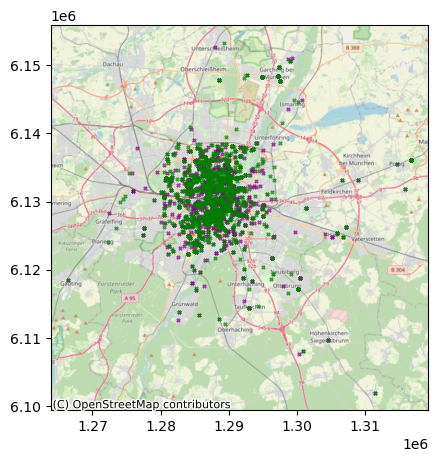

In [19]:
# STATIC MAP WITH CONTEXTILY

# Erstellen eines GeoDataFrames für die Startpunkte
geo_start = gpd.points_from_xy(x=january_1_2023['STARTLON'], crs="EPSG:4326", y=january_1_2023['STARTLAT'])
gdf_start = gpd.GeoDataFrame(january_1_2023, geometry=geo_start)

# Start-GDF in OpenStreetMap-Projektion überführen
gdf_start = gdf_start.to_crs(epsg=3857)

#Erstellen eines GeoDataFrames für die Endpunkte
geo_end = gpd.points_from_xy(x=january_1_2023['ENDLON'], y=january_1_2023["ENDLAT"], crs="EPSG:4326")
gdf_end = gpd.GeoDataFrame(january_1_2023, geometry=geo_end)

# End-GDF in OpenStreetMap-Projektion überführen
gdf_end = gdf_end.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Plotten der Punkte
gdf_start.plot(ax=ax, marker='x', color='purple', markersize=5, alpha=0.7) # Start
gdf_end.plot(ax=ax, marker='x', color='green', markersize=5, alpha=0.7) # Ziel

# Füge die Basemap von contextily hinzu
cx.add_basemap(ax, crs=gdf_start.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)


### Folium (dynamische Karte)

In [20]:
# DYNAMIC MAP WITH FOLIUM

# Geht bei Folium auch ohne GeoDataFrame, daher auskommentiert
# geo_start = gpd.points_from_xy(x=january_1_2023['STARTLON'], crs="EPSG:4326", y=january_1_2023['STARTLAT'])
# gdf_start_jan_1_2023 = gpd.GeoDataFrame(january_1_2023, geometry=geo_start)

map_center = [january_1_2023['STARTLAT'].mean(), january_1_2023['STARTLON'].mean()]
my_map = folium.Map(location=map_center, zoom_start=13)

# january_1_2023_folium.apply(lambda row:folium.CircleMarker(location=[row["STARTLAT"], row["STARTLON"]]).add_to(my_map), axis=1)
for index, row in january_1_2023.iterrows():
    folium.CircleMarker(location=[row["STARTLAT"], row["STARTLON"]],
                        radius=1.3,
                        color="purple",
                        fill=True,
                        fill_color="purple",
                        fill_opacity=0.5
                        ).add_to(my_map)
    
for index, row in january_1_2023.iterrows():
    folium.CircleMarker(location=[row["ENDLAT"], row["ENDLON"]],
                        radius=1.3,
                        color="green",
                        fill=True,
                        fill_color="green",
                        fill_opacity=0.5
                        ).add_to(my_map)
    

# Lade die GeoJSON-Datei der Stadtviertel
city_districts = gpd.read_file("neighbourhoods.geojson")

# Füge die Stadtviertel als GeoJSON auf die Karte hinzu
folium.GeoJson(
    city_districts,
    name="Stadtviertel",
    style_function=lambda feature: {
        'fillColor': 'lightblue',  # Füllfarbe der Stadtviertel
        'color': 'blue',  # Randfarbe
        'weight': 2,  # Randstärke
        'opacity': 0.6,  # Rand-Opazität
        'fillOpacity': 0.4  # Füll-Opazität
    }
).add_to(my_map)

folium.GeoJson(
    city_area,
    name="Stadtbereich",
    style_function=lambda feature: {
        'fillColor': 'lightgreen',  # Füllfarbe der Stadtviertel
        'color': 'green',  # Randfarbe
        'weight': 2,  # Randstärke
        'opacity': 0.6,  # Rand-Opazität
        'fillOpacity': 0.4  # Füll-Opazität
    }
).add_to(my_map)

# Uncomment to show map:
my_map